### Imports

In [1]:
import numpy as np
import matplotlib.mlab as mlab
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

<br><br>
The FFT $y[k]$ of length $N$ of the length-$N$ sequence $x[n]$ is defined as
<img src="fft1.png" width="200" height="100" />
and the inverse transform is defined as follows
<img src="fft2.png" width="200" height="100" />
<br><br>
These transforms can be calculated by means of np.fft.fft (np.fft.rfft) and np.fft.ifft. (https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html)
<br><br>
From the definition of the FFT it can be seen that
<br><br>
<img src="fft3.png" width="150" height="75" />
<br><br>
For $N$ even, the elements $y[1]...y[N/2−1]$ contain the positive-frequency terms, and the elements $y[N/2]...y[N−1]$ contain the negative-frequency terms, in order of decreasingly negative frequency. For $N$ odd, the elements $y[1]...y[(N−1)/2]$ contain the positive-frequency terms, and the elements $y[(N+1)/2]...y[N−1]$ contain the negative-frequency terms, in order of decreasingly negative frequency.
<br><br>
In case the sequence x is real-valued, the values of $y[n]$ for positive frequencies is the conjugate of the values y[n] for negative frequencies (because the spectrum is symmetric). Typically, only the FFT corresponding to positive frequencies is plotted.
<br><br>
np.fft.fft gives $y[0],y[1]...y[N-1]$ while np.fft.rfft gives $y[0],y[1]...y[N/2−1]$ (real FFT).
<br><br>
Now, let us plot the FFT of the sum of two sines as an example.

In [6]:
# Number of samples
N = 600
# sampling rate
fs_example = 800.0
# sample spacing
dt_example = 1.0 / fs_example

t = (1 / fs_example * np.arange(N))

Using $N = 600$ samples with the sample rate $f_s = 800$, assume that $t$ runs from $0$ to $N/f_s$.
<br><br>
We define the sum of two sines as:
$$ f(t) = a_1 \mathrm{sin}(2\pi w_1 t) + a_2 \mathrm{sin}(2\pi w_2 t) $$
<br> where $a_1 = 0.5, a_2 = 1.6, w_1 = 50, w_2 = 130$.
<br><br>
<b>1. Using np.fft.rfft:</b><br>
Now, compute the FFT of $f(t)$ by doing np.fft.rfft(f(t)). Then, take the absolute value of it and then multiply by a normalization factor $2/N$. 
<br><br>
You can get the frequency using np.fft.rfftfreq.
<br><br>
<b>2. Using np.fft.fft:</b><br>
Similarly, compute the FFT of $f(t)$ by doing np.fft.fft(f(t)) and take the absolute value of it and then multiply by a normalization factor $2/N$. You can also get the frequency using np.fft.fftfreq.
<br><br>
Now, select the first $N/2$ values in order to only plot the positive-frequency terms. 
<br><br>
<span style="color:blue"> <i> Plot the FFT of $f(t)$ using both np.fft.rfft and np.fft.fft.  </i></span> <br>

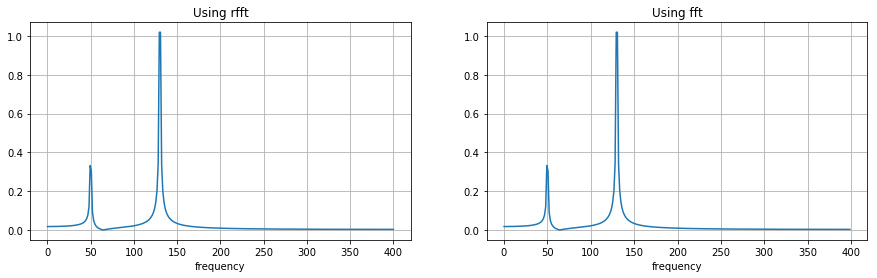

In [7]:
# Define f(t)
def f(t, a1, a2, w1, w2):
    return a1*np.sin(2.0*np.pi*w1*t) + a2*np.sin(2.0*np.pi*w2*t)
    
y = f(t, 0.5, 1.6, 50, 130)

# Use rfft
norm = 2.0/N
yf = np.fft.rfft(y)
abs_yf = norm*np.abs(yf)

xf = np.fft.rfftfreq(len(y), d = 1./fs_example)


fig, axes = plt.subplots(1,2,figsize=(15,4))
ax = axes[0]
ax.plot(xf, abs_yf)
ax.set_xlabel('frequency')
ax.grid(); ax.set_title("Using rfft")

# Use fft
norm = 2.0/N
yf = np.fft.fft(y)
abs_yf = norm*np.abs(yf)

xf = np.fft.fftfreq(len(y), d = 1./fs_example)

ax = axes[1]
plt.plot(xf[0:N//2], abs_yf[0:N//2])
ax.set_xlabel('frequency')
ax.grid(); ax.set_title("Using fft")

plt.show()

Now, transform back to the time domain. Let yf = np.fft.rfft(f(t)). Then, you can find the inverse FFT by doing np.fft.irfft(yf, len(f(t))). 
<br><br>
<span style="color:blue"> <i> Plot the inverse FFT of yf (equivalent to ploting $f(t)$ vs. $t$).  </i></span> <br>

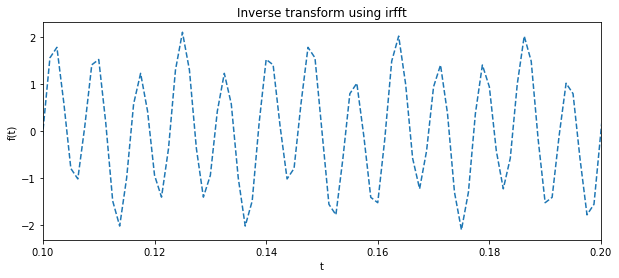

In [8]:
y = f(t, 0.5, 1.6, 50, 130)
yf = np.fft.rfft(y)
y_inv = np.fft.irfft(yf, len(y))

plt.figure(figsize = (10,4))

plt.plot(t, y_inv, '--')
plt.xlabel('t'); plt.ylabel('f(t)')
plt.xlim(0.1, 0.2); plt.title("Inverse transform using irfft")
plt.show()